In [2297]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2298]:
data=pd.read_csv(r"C:\Users\suraj\Downloads\archive (14)\bengaluru_house_prices.csv")
df=pd.read_csv(r"C:\Users\suraj\Downloads\archive (14)\bengaluru_house_prices.csv")

In [2299]:
# len(data)
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [2300]:
# data.info

In [2301]:
data['location'].isnull().sum()
data = data.dropna(subset=['location'])

In [2302]:
# data['size'].nunique()
# data['size'].unique()
# data[data['size'].isnull()]
data=data.dropna(subset=['size'])

# As there are only 13 columns of RK type i can remove them to reduce complexity of data

In [2304]:
# data[data['size'].str.contains("RK", na=False)]

data=data[~data['size'].str.contains("RK", na=False)] 


# I can take bedroom as bhk and i.m going to remove the bhk string and bedroom str from number and changing the data type to int

In [2306]:
data['size'] = data['size'].str.replace('BHK', '', regex=False)
data['size'] = data['size'].str.replace('Bedroom', '', regex=False)
data['size'] = data['size'].str.strip()

data['size'].dtypes
data['size']=data['size'].astype('Int64')

In [2307]:
(data['society'].isnull().sum()/len(data['society']))*100

# As 41% of the data in this column is missing i would prefer to remove it


41.354401805869074

In [2308]:
data=data.drop(columns='society')

In [2309]:
data.head()

area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   
2        Built-up  Area  Ready To Move               Uttarahalli     3   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli     3   
4  Super built-up  Area  Ready To Move                  Kothanur     2   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

In [2310]:
# data['location'].isnull()
data['location'].nunique()

1296

In [2311]:
# data.groupby('location')['price'].mean().sort_values(ascending=False)

In [2312]:
loc_price_mean = data.groupby('location')['price'].mean()
data['location_target_enc'] = data['location'].map(loc_price_mean)

In [2313]:
loc_price_mean

location
 Devarabeesana Halli                                   124.833333
 Devarachikkanahalli                                    62.714286
 Mysore Highway                                         36.875000
 Sector 1 HSR Layout                                   276.000000
 ittamadu                                              110.000000
 south                                                 445.000000
1 Annasandrapalya                                      150.000000
1 Giri Nagar                                           360.000000
1 Immadihalli                                          150.000000
1 Ramamurthy Nagar                                     170.000000
12th cross srinivas nagar banshankari 3rd stage        200.000000
1A Block Koramangala                                   650.000000
1Channasandra                                          125.000000
1Hanuman Nagar                                         490.000000
1Hoysalanagar                                          275.000000
1

In [2314]:
# correlation with price
data[['location_target_enc', 'price']].corr() # high corr with price

location_target_enc     price
location_target_enc             1.000000  0.630606
price                           0.630606  1.000000

In [2315]:
# sns.regplot(x='location_target_enc', y='price', data=data)
# plt.show()

In [2316]:
data.head()

area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   
2        Built-up  Area  Ready To Move               Uttarahalli     3   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli     3   
4  Super built-up  Area  Ready To Move                  Kothanur     2   

  total_sqft  bath  balcony   price  location_target_enc  
0       1056   2.0      1.0   39.07            48.316667  
1       2600   5.0      3.0  120.00           115.015882  
2       1440   2.0      3.0   62.00            61.252527  
3       1521   3.0      1.0   95.00           115.348261  
4       1200   2.0      1.0   51.00            95.630303

In [2317]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [2318]:
area_type_mean = data.groupby('area_type')['price'].mean()
data['area_type_enc'] = data['area_type'].map(area_type_mean)

In [2319]:
data.head()

area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   
2        Built-up  Area  Ready To Move               Uttarahalli     3   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli     3   
4  Super built-up  Area  Ready To Move                  Kothanur     2   

  total_sqft  bath  balcony   price  location_target_enc  area_type_enc  
0       1056   2.0      1.0   39.07            48.316667      93.039255  
1       2600   5.0      3.0  120.00           115.015882     209.368148  
2       1440   2.0      3.0   62.00            61.252527     104.410868  
3       1521   3.0      1.0   95.00           115.348261      93.039255  
4       1200   2.0      1.0   51.00            95.630303      93.039255

In [2320]:
data.dtypes

area_type               object
availability            object
location                object
size                     Int64
total_sqft              object
bath                   float64
balcony                float64
price                  float64
location_target_enc    float64
area_type_enc          float64
dtype: object

In [2321]:
# data[data['total_sqft']=='1133 - 1384']
data[data['total_sqft'].str.contains("G", na=False)]


area_type   availability                             location  size  \
6552   Plot  Area  Ready To Move  5 Bedroom Farm House in Lakshmipura     5   
9423   Plot  Area  Ready To Move                     Ramamurthy Nagar     1   
11320  Plot  Area  Ready To Move                        Arishinakunte     1   

      total_sqft  bath  balcony  price  location_target_enc  area_type_enc  
6552    24Guntha   6.0      2.0  550.0           550.000000     209.368148  
9423    1Grounds   1.0      1.0   48.0            88.402055     209.368148  
11320   38Guntha   1.0      0.0  170.0           153.333333     209.368148

In [2322]:
data['total_sqft'] = data['total_sqft'].str.replace('Sq. Meter', '', regex=False)
data['total_sqft'] = data['total_sqft'].str.replace('Sq. Yards', '', regex=False)
data['total_sqft'] = data['total_sqft'].str.strip()
data=data[~data['total_sqft'].str.contains("A", na=False)] 
data=data[~data['total_sqft'].str.contains("G", na=False)] 
data=data[~data['total_sqft'].str.contains("C", na=False)] 
data=data[~data['total_sqft'].str.contains("P", na=False)] 

# This function will replace the values like 1000-1100 with its mean which makes things easy for us

In [2324]:
def convert_sqft(x):
    try:
        if '-' in x:
            nums = x.split('-')
            return (float(nums[0]) + float(nums[1])) / 2
        else:
            return float(x)   # single number case
    except:
        return np.nan   # if not convertible (e.g. Sq. Meter etc.)

data.loc[data['total_sqft'].str.contains("-", na=False),'total_sqft'] = (data.loc[data['total_sqft'].str.contains("-", na=False), 'total_sqft'].apply(convert_sqft))


data['total_sqft'] = data['total_sqft'].astype(float)


In [2325]:
# pd.set_option("display.max_rows", None)
# data['total_sqft']

In [2326]:
data.drop(columns=['area_type', 'availability', 'location'], errors='ignore').corr()

size  total_sqft      bath   balcony     price  \
size                 1.000000    0.346318  0.897957  0.184590  0.398020   
total_sqft           0.346318    1.000000  0.390570  0.147796  0.574272   
bath                 0.897957    0.390570  1.000000  0.201654  0.456084   
balcony              0.184590    0.147796  0.201654  1.000000  0.119942   
price                0.398020    0.574272  0.456084  0.119942  1.000000   
location_target_enc  0.209355    0.318557  0.253681  0.074861  0.630327   
area_type_enc        0.417230    0.098301  0.384664 -0.104201  0.275344   

                     location_target_enc  area_type_enc  
size                            0.209355       0.417230  
total_sqft                      0.318557       0.098301  
bath                            0.253681       0.384664  
balcony                         0.074861      -0.104201  
price                           0.630327       0.275344  
location_target_enc             1.000000       0.124257  
area_type_enc                   0.124257       1.000000

# I'm going to remove balcony as its correlation with price is very less

In [2328]:
data=data.drop(columns='balcony')

In [2329]:
data.head()

area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   
2        Built-up  Area  Ready To Move               Uttarahalli     3   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli     3   
4  Super built-up  Area  Ready To Move                  Kothanur     2   

   total_sqft  bath   price  location_target_enc  area_type_enc  
0      1056.0   2.0   39.07            48.316667      93.039255  
1      2600.0   5.0  120.00           115.015882     209.368148  
2      1440.0   2.0   62.00            61.252527     104.410868  
3      1521.0   3.0   95.00           115.348261      93.039255  
4      1200.0   2.0   51.00            95.630303      93.039255

In [2330]:
data['location'].unique(),data['location_target_enc'].unique()

(array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
        '12th cross srinivas nagar banshankari 3rd stage',
        'Havanur extension', 'Abshot Layout'], dtype=object),
 array([  48.31666667,  115.01588235,   61.25252688,  115.34826087,
          95.63030303,  128.20023191,  184.08030303,  327.69308411,
         102.21371429,  240.        ,  100.52295302,   61.01729167,
          94.40676829,   68.82897959,   41.72509804,   64.71403509,
         662.85714286,   81.875     ,   61.44150685,  150.19571429,
          82.72559829,   91.19333333,   51.83333333,   54.97238411,
         131.6758    ,   86.44464623,  160.81491525,  127.96875   ,
          70.53379121,   55.54091954,  132.65765957,   71.17033333,
         102.57142857,  119.38154912,   66.3       ,  100.16981132,
          43.413     ,   84.62961538,  130.33333333,   50.        ,
         100.04469388,   97.13888889,   58.17321429,  120.20569767,
         207.5       ,   68.89442857,   61.07971429,   

# i'm going to remove null values from bath as the number is only 57

In [2332]:
# data[data['bath'].isnull()]

data = data.dropna(subset=['bath'])

In [2333]:
(len(data)/len(df))*100
# we have 99percent of the original data left after all this preprocessingS

99.24174174174173

# Now we have to deal with outliers

In [2335]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'price', 'location_target_enc', 'area_type_enc'],
      dtype='object')

In [2336]:
cols=['size','total_sqft','bath', 'location_target_enc', 'area_type_enc']

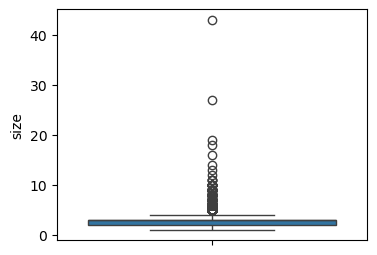

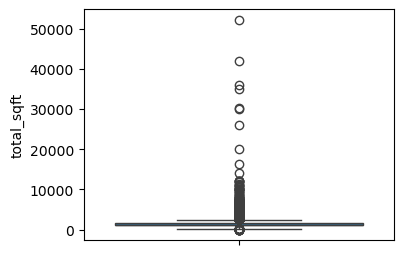

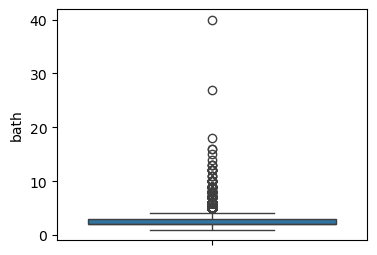

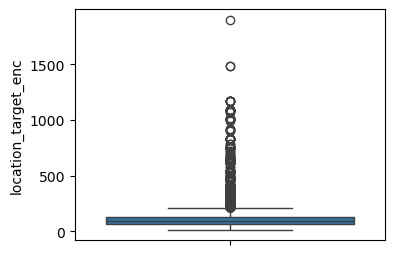

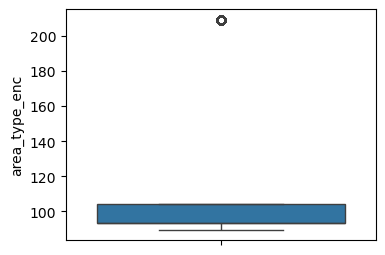

In [2337]:
for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])
    plt.show()

In [2338]:
data.loc[data['size']>=5,'size'].count()

839

# This IQR method will clip the values between the range of upper and lower bound values above upper will become equal to upper and same for lower

In [2340]:
def iqr_clip(Data,col):
    # Quartiles
    q1 = Data[col].quantile(0.25)
    q2 = Data[col].quantile(0.50)  # median (optional)
    q3 = Data[col].quantile(0.75)
    
    # IQR
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    # Clip values
    Data[col] = Data[col].astype('float').clip(lower, upper)
    
    return Data


In [2341]:
for col in cols:
    iqr_clip(data,col)

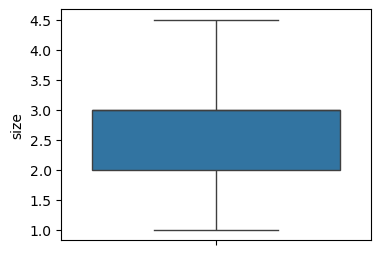

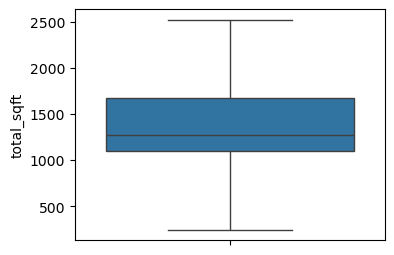

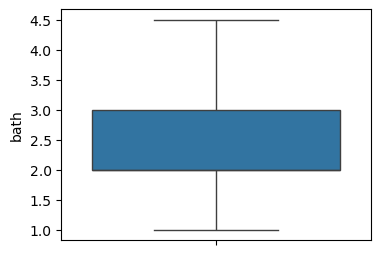

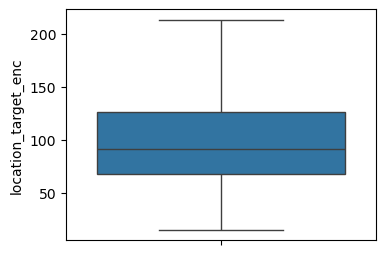

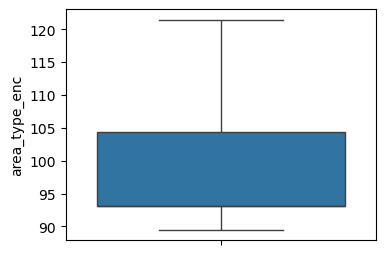

In [2342]:
for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])
    plt.show()

# AS i have done with outlier we have to update the values of location_enc and area_enc

In [2344]:
loc_price_mean = data.groupby('location')['price'].mean()
data['location_target_enc'] = data['location'].map(loc_price_mean)
loc_price_mean.to_csv("location_encoding.csv", index=True)

In [2345]:
lc=pd.read_csv(r"location_encoding.csv")

In [2346]:
lc

location        price
0                                   Devarabeesana Halli   124.833333
1                                   Devarachikkanahalli    62.714286
2                                        Mysore Highway    36.875000
3                                   Sector 1 HSR Layout   276.000000
4                                              ittamadu   110.000000
5                                                 south   445.000000
6                                     1 Annasandrapalya   150.000000
7                                          1 Giri Nagar   360.000000
8                                         1 Immadihalli   150.000000
9                                    1 Ramamurthy Nagar   170.000000
10      12th cross srinivas nagar banshankari 3rd stage   200.000000
11                                 1A Block Koramangala   650.000000
12                                        1Channasandra   125.000000
13                                       1Hanuman Nagar   490.000000
14                                        1Hoysalanagar   275.000000
15                                        1Kasavanhalli   200.000000
16                                 1st Block BEL Layout   167.500000
17                                 1st Block HBR Layout   231.666667
18                                1st Block HRBR Layout   209.625000
19                                  1st Block Jayanagar   207.500000
20                                1st Block Koramangala   283.450000
21                                   1st Phase JP Nagar   170.700000
22                                     1st Stage Domlur    65.000000
23                               1st Stage Indira Nagar   195.800000
24                       1st Stage Radha Krishna Layout   250.000000
25                            2Electronic City Phase II   230.000000
26                                 2nd Block Bel Layout    92.000000
27                                 2nd Block Hbr Layout    55.000000
28                                2nd Block Hrbr Layout   285.571429
29                                  2nd Block Jayanagar   467.500000
30                                2nd Block Koramangala   761.000000
31                                   2nd Phase JP Nagar   161.944444
32                            2nd Phase Judicial Layout    46.181818
33                        2nd Stage Arekere Mico Layout   169.000000
34                                 2nd Stage Nagarbhavi   220.833333
35                         2nd phase jp nagar, jp nagar   205.000000
36                               3rd Block Banashankari   366.600000
37                                 3rd Block HBR Layout   100.000000
38                                3rd Block Hrbr Layout   143.571429
39                                  3rd Block Jayanagar   170.000000
40                                3rd Block Koramangala   220.000000
41                                 3rd Phase Iti Layout    63.000000
42                                   3rd Phase JP Nagar   231.333333
43                      3rd Stage Raja Rajeshwari Nagar    65.000000
44                      4 Bedroom Farm House in Bagalur    80.000000
45                                 4th Block HBR Layout   138.000000
46                                  4th Block Jayanagar   300.000000
47                                4th Block Koramangala   348.555556
48                                   4th Phase JP Nagar   126.725000
49                                4th T block Jayanagar   280.428571
50                                 5th Block Hbr Layout   202.750000
51                                  5th Block Jayanagar   905.000000
52                                   5th Phase JP Nagar    86.112821
53                                5th Stage BEML Layout   165.000000
54                                5th block Koramangala   520.000000
55                                  6th Block Jayanagar   255.000000
56                               6th Block Rajaji Nagar   190.000000
57                                   6th Phas

In [2347]:
data['area_type'].unique(),data['area_type_enc'].unique()

(array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
        'Carpet  Area'], dtype=object),
 array([ 93.03925456, 121.4682878 , 104.41086785,  89.50235632]))

In [2348]:
area_type_mean = data.groupby('area_type')['price'].mean()
data['area_type_enc'] = data['area_type'].map(area_type_mean)
area_type_mean.to_csv("area_encoding.csv", index=True)

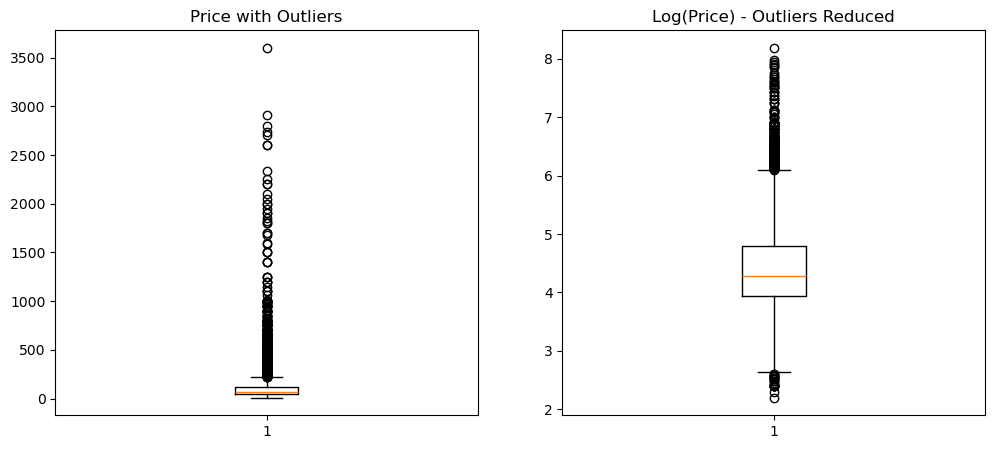

In [2349]:
# Before log (with outliers)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(data['price'])
plt.title("Price with Outliers")

# After log transform
plt.subplot(1,2,2)
plt.boxplot(np.log1p(data['price']))
plt.title("Log(Price) - Outliers Reduced")

plt.show()

# Now for output col(price) i'm using log transform so that my model can also predict for higher prices

In [2351]:
data['price']=np.log1p(data['price'])

In [2352]:
data.head()

area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II   2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi   4.0   
2        Built-up  Area  Ready To Move               Uttarahalli   3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli   3.0   
4  Super built-up  Area  Ready To Move                  Kothanur   2.0   

   total_sqft  bath     price  location_target_enc  area_type_enc  
0      1056.0   2.0  3.690628            47.406870      92.708660  
1      2525.0   4.5  4.795791           115.015882     209.619795  
2      1440.0   2.0  4.143135            61.252527     104.046848  
3      1521.0   3.0  4.564348           115.348261      92.708660  
4      1200.0   2.0  3.951244            95.630303      92.708660

# After this data preprocessing is complete

In [2354]:
Model_data=data.drop(columns=['area_type', 'availability', 'location'])

In [2355]:
Model_data.head()

size  total_sqft  bath     price  location_target_enc  area_type_enc
0   2.0      1056.0   2.0  3.690628            47.406870      92.708660
1   4.0      2525.0   4.5  4.795791           115.015882     209.619795
2   3.0      1440.0   2.0  4.143135            61.252527     104.046848
3   3.0      1521.0   3.0  4.564348           115.348261      92.708660
4   2.0      1200.0   2.0  3.951244            95.630303      92.708660

In [2356]:
x=Model_data.drop(columns='price')
y=Model_data['price']

In [2357]:
x

size  total_sqft  bath  location_target_enc  area_type_enc
0       2.0    1056.000   2.0            47.406870      92.708660
1       4.0    2525.000   4.5           115.015882     209.619795
2       3.0    1440.000   2.0            61.252527     104.046848
3       3.0    1521.000   3.0           115.348261      92.708660
4       2.0    1200.000   2.0            95.630303      92.708660
5       2.0    1170.000   2.0           128.337678      92.708660
6       4.0    2525.000   4.0           184.080303      92.708660
7       4.0    2525.000   4.0           326.779811      92.708660
8       3.0    1310.000   3.0           102.213714      92.708660
9       4.5    1020.000   4.5           240.000000     209.619795
10      3.0    1800.000   2.0           128.337678      92.708660
11      4.0    2525.000   4.5           128.337678     209.619795
12      2.0    1000.000   2.0           100.522953      92.708660
13      2.0    1100.000   2.0            61.017292     104.046848
14      3.0    2250.000   3.0            94.577346     209.619795
15      2.0    1175.000   2.0            68.527500      92.708660
16      3.0    1180.000   3.0            41.725098      92.708660
17      3.0    1540.000   3.0            64.714035      92.708660
18      3.0    2525.000   4.0           662.857143      92.708660
19      2.0    1100.000   2.0            81.875000      92.708660
20      1.0     600.000   1.0            61.441507     104.046848
21      3.0    1755.000   3.0           147.505500      92.708660
22      4.0    2525.000   4.5            82.874013     209.619795
23      3.0    1767.000   3.0            91.193333      92.708660
25      3.0    1250.000   3.0            51.833333      92.708660
26      2.0     660.000   1.0            54.972384      92.708660
27      3.0    1610.000   3.0           128.337678     104.046848
28      2.0    1151.000   2.0           131.675800      92.708660
29      3.0    1025.000   2.0            54.972384      92.708660
30      4.0    2475.000   4.0            86.120405      92.708660
31      3.0    1075.000   2.0            41.725098      92.708660
32      3.0    1760.000   2.0           160.441705      92.708660
33      3.0    1693.000   3.0            64.714035      92.708660
34      3.0    1925.000   3.0           127.968750     104.046848
35      2.0     700.000   2.0            70.918220      92.708660
36      2.0    1070.000   2.0            55.480349      92.708660
37      3.0    1724.000   3.0           132.657660      92.708660
38      3.0    1290.000   2.0            71.170333      92.708660
39      2.0    1143.000   2.0            61.252527     104.046848
40      2.0    1296.000   2.0           102.571429     104.046848
41      3.0    1254.000   3.0           118.743597      92.708660
42      1.0     600.000   1.0            66.300000      92.708660
43      1.0     660.000   1.0            86.120405     209.619795
44      2.0    1330.740   2.0            70.918220      92.708660
45      4.5     600.000   4.5           100.169811     209.619795
46      2.0     970.000   2.0            43.413000      92.708660
47      2.0    1459.000   2.0           128.337678      92.708660
48      2.0     800.000   1.0            84.625455     209.619795
49      2.0     869.000   2.0           130.333333     104.046848
50      2.0    1270.000   2.0            50.000000      92.708660
51      3.0    1670.000   3.0            99.816458      92.708660
52      3.0    2010.000   3.0           128.337678     104.046848
53      2.0    1185.000   2.0            97.138889      92.708660
54      3.0    1600.000   2.0            86.120405      92.708660
55      2.0    1200.000   2.0            58.173214      92.708660
57      2.0    1500.000   2.0           662.857143      92.708660
58      4.5    1407.000   4.0           102.571429     209.619795
59      2.0     840.000   2.0           207.500000      92.708660
60      3.0    2525.000   3.0           240.000000     209.619795
61      2.0     845.000   2.0            66.300

In [2358]:
# y

In [2359]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [2360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data only
x_train_scaled = scaler.fit_transform(x_train)

# Use the same scaler to transform test data
x_test_scaled = scaler.transform(x_test)

In [2396]:
x_train_scaled

array([[ 0.36362346, -1.52094311, -0.64612368,  0.17176582,  2.39345981],
       [ 0.36362346,  0.52134387,  0.44827159, -0.68557399,  2.39345981],
       [-0.79704507, -0.13745838, -0.64612368, -0.27278278, -0.46960265],
       ...,
       [ 1.52429199,  2.11990816,  1.54266685,  1.32787653,  2.39345981],
       [ 0.36362346,  0.3275785 ,  0.44827159,  0.8420408 , -0.46960265],
       [-1.9577136 , -1.87782016, -1.74051895, -0.83886516,  2.39345981]])

In [2361]:
y_scaler = StandardScaler()

# Fit only on training y
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))

# Transform test y
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

# First i'm going to Linear reg as baseline model lets how well it doing 

In [2363]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [2364]:
lr.score(x_test_scaled,y_test_scaled),lr.score(x_train_scaled,y_train_scaled)

(0.7765418285129029, 0.7866955624138532)

# Now to calculate all the performance metrices

In [2366]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred_lr = lr.predict(x_train_scaled)
y_test_pred_lr  = lr.predict(x_test_scaled)

# Train metrics
train_mae = mean_absolute_error(y_train, y_train_pred_lr)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_scaled, y_train_pred_lr)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred_lr)
test_mse = mean_squared_error(y_test, y_test_pred_lr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_scaled, y_test_pred_lr)

print("Train Metrics:")
print(f"MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


Train Metrics:
MAE: 4.4152, MSE: 19.6194, RMSE: 4.4294, R²: 0.7867

Test Metrics:
MAE: 4.4182, MSE: 19.7045, RMSE: 4.4390, R²: 0.7765


# I got 78percent to score which is good But i can improve this using Xg boost 

In [2368]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.02, max_depth=5, random_state=42,reg_alpha=0.1, reg_lambda=1)
xgb.fit(x_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [2369]:
y_train_pred = xgb.predict(x_train_scaled)
y_test_pred = xgb.predict(x_test_scaled)

In [2370]:
def print_metrics(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Evaluate
print_metrics(y_train_scaled, y_train_pred, "Train")
print_metrics(y_test_scaled, y_test_pred, "Test")


Train Metrics:
MAE: 0.2620, MSE: 0.1189, RMSE: 0.3449, R²: 0.8811

Test Metrics:
MAE: 0.3093, MSE: 0.1787, RMSE: 0.4228, R²: 0.8260


In [2371]:
y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred_original  = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_original  = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Now lets see if we can make more improvements by hyperparameter tuning

In [2373]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train_scaled)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Score: -0.17478315831561614


# after hyperparameter tuning we got neg mse of -0.179 which is good

In [2375]:
best_xgb = random_search.best_estimator_

In [2376]:
best_xgb.score(x_train_scaled,y_train_scaled),best_xgb.score(x_test_scaled,y_test_scaled)

(0.8705515218012545, 0.8278876773915568)

# Got not much improvement in score

In [2378]:
# import matplotlib.pyplot as plt
# y_test_pred_lr= lr.predict(x_test_scaled)
# plt.scatter(y_test_scaled, y_test_pred, alpha=0.6)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Predicted vs Actual (XGBoost)")
# plt.plot([y_test_scaled.min(), y_test_scaled.max()],
#          [y_test_scaled.min(), y_test_scaled.max()],
#          "r--")
# plt.show()
# plt.scatter(y_test_scaled, y_test_pred_lr, alpha=0.6)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Predicted vs Actual (Linear_reg)")
# plt.plot([y_test_scaled.min(), y_test_scaled.max()],
#          [y_test_scaled.min(), y_test_scaled.max()],
#          "r--")
# plt.show()


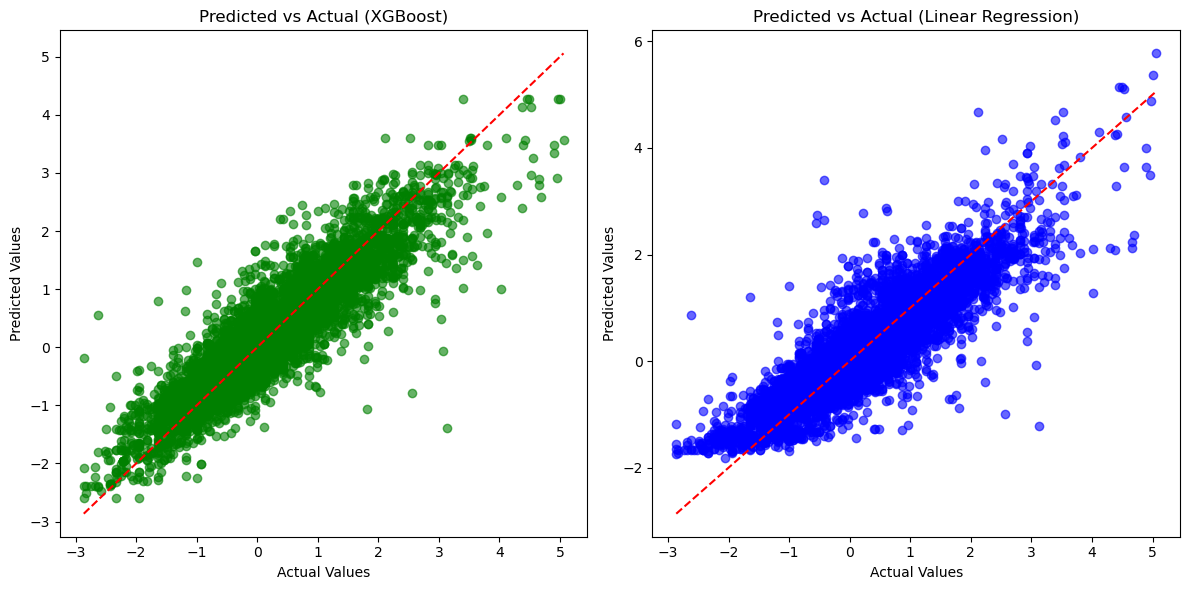

In [2379]:
import matplotlib.pyplot as plt

# Predictions
y_test_pred_lr = lr.predict(x_test_scaled)
y_test_pred_xgb = best_xgb.predict(x_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- XGBoost ----
axes[0].scatter(y_test_scaled, y_test_pred_xgb, alpha=0.6, color="green")
axes[0].plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()],
             "r--")
axes[0].set_title("Predicted vs Actual (XGBoost)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# ---- Linear Regression ----
axes[1].scatter(y_test_scaled, y_test_pred_lr, alpha=0.6, color="blue")
axes[1].plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()],
             "r--")
axes[1].set_title("Predicted vs Actual (Linear Regression)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [2380]:
import pickle

pickle.dump(best_xgb,open('xgb_model.pkl','wb'))

# Save scaler (if you used StandardScaler/MinMaxScaler)
pickle.dump(scaler, open('scaler_X.pkl', 'wb'))
pickle.dump(y_scaler, open('scaler_y.pkl', 'wb'))
# pickle.dump(encoder, open('scaler_y.pkl', 'wb'))


In [2381]:
xgb.score(x_test_scaled,y_test_scaled)

0.8260455432209348

In [2388]:
# # Load model
# with open("xgb_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

# # Load scaler
# with open("scaler.pkl", "rb") as f:
#     loaded_scaler = pickle.load(f)


In [2402]:
loaded_model = pickle.load(open('xgb_model.pkl', 'rb'))
loaded_scaler_X = pickle.load(open('scaler_X.pkl', 'rb'))
loaded_scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))

# Example new input (replace with real feature order)
# Suppose your features are [bhk, bath, sqft, area, location_encoded]
new_data = [[2,1200,2.0,95.630303,92.708660]]
# 3	1521.0	3.0	95.00	115.348261	93.039255
# 2	1056	2.0	1.0	39.07	48.316667	93.03925
# 2.0	1056.0	2.0		47.406870	92.708660
# 2.0	1200.0	2.0	3.951244	95.630303	92.708660

# Scale input features
new_data_scaled = loaded_scaler_X.transform(new_data)

# Predict (in log scale or scaled target)
log_price_pred = loaded_model.predict(new_data_scaled)

# Inverse transform back to original price
# If you used StandardScaler on y
price_pred = loaded_scaler_y.inverse_transform(log_price_pred.reshape(-1,1))

# If you used np.log1p(y) instead
price_pred = np.expm1(price_pred)

print("Predicted Price:", price_pred[0])

Predicted Price: [63.294624]


In [2400]:
new_data_scaled

array([[-0.79704507, -0.7265051 , -0.64612368, -0.67548191, -0.46960265]])